https://www.kaggle.com/datasets/uciml/mushroom-classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Для начала, исследуем данные на наличие отсутствующие данные, переведм данные в из категориальных переменные в численные, посмотрим на распределение данных

<Axes: >

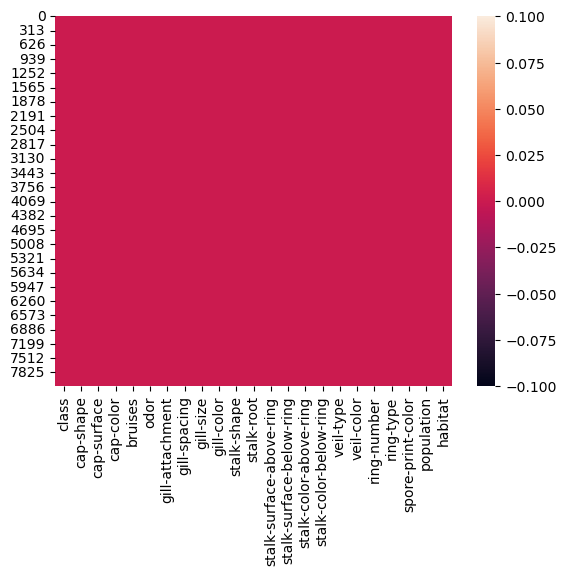

In [5]:
sns.heatmap(df.isna())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df['class'].value_counts() 

class
e    4208
p    3916
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
X = df.drop('class', axis = 1)

In [10]:
y = df['class']

In [11]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [12]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [13]:
le = {column : LabelEncoder() for column in X}

In [14]:
for column, encoder in le.items():
    encoder.fit(X[column])
    X[column] = encoder.transform(X[column])

In [15]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
def train(model):
    model.fit(X_train, y_train)
    
def predict(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [20]:
from sklearn.svm import SVC

In [21]:
model = SVC()

In [22]:
grid_params = {'C':[0.01, 0.1, 0.5, 1, 10, 100], 'kernel':['rbf', 'linear'], 'gamma': [1, 0.1, 0.01, 0.001]}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid_model_svm = GridSearchCV(model, grid_params, scoring='accuracy', cv = 5)

In [25]:
train(grid_model_svm)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       851
           p       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [27]:
grid_model_svm.best_params_

{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}

In [43]:
svc_model = SVC(C = 0.5, gamma=0.1)

In [44]:
train(svc_model)

In [45]:
predict(svm_model, X_test, y_test)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       223
           p       1.00      1.00      1.00       183

    accuracy                           1.00       406
   macro avg       1.00      1.00      1.00       406
weighted avg       1.00      1.00      1.00       406

[[223   0]
 [  0 183]]


In [47]:
predict(svc_model, X_val, y_val)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       221
           p       1.00      1.00      1.00       186

    accuracy                           1.00       407
   macro avg       1.00      1.00      1.00       407
weighted avg       1.00      1.00      1.00       407

[[221   0]
 [  0 186]]


Убеждаемся в том, что модель хорошо обучилась и не переобучена, т.к хорошо работает на тех данных, которые не видела